In [4]:
import pandas as pd
import pymysql

def create_db():
    db_name = "TeamProject"
    conn = pymysql.connect(host='localhost', user='root', password='forhs4534!', charset='utf8')
    curs = conn.cursor()
    sql_cmd = "create database {0}".format(db_name)
    curs.execute( sql_cmd )
    conn.commit()
    conn.close()

def create_table_job_korea():
    conn = pymysql.connect(host='localhost', user='root', password='forhs4534!', db="TeamProject", charset='utf8')
    curs = conn.cursor()
    sql_cmd = "create table job_korea (age VARCHAR(100), year INT, population INT, economy INT, employed INT, unemployed INT);"
    curs.execute( sql_cmd )
    conn.commit()
    conn.close()
    
def insert_data():
    conn = pymysql.connect(host='localhost', user='root', password='forhs4534!', db="TeamProject", charset='utf8')
    curs = conn.cursor()

    # Load csv file
    data = pd.read_csv( "korea_jop.csv", encoding='CP949' )
    data_list = []
    for i in  data.itertuples():
        data_list.append( (i[1],i[2],i[3],i[4],i[5],i[6]) )
    data_list = tuple(data_list)

    # Execute query
    sql = """insert into job_korea(age,year,population,economy,employed,unemployed)
    values(%s, %s, %s, %s, %s, %s, %s)"""
    print( data_list )
    curs.executemany(sql, data_list)
    conn.commit()
    conn.close()

In [195]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt



conn = pymysql.connect(host='localhost', user='root', password='forhs4534!',
db = 'koroecd', charset='utf8')
cur = conn.cursor()
query = """
select countryname,Value from oecd
inner join 국가식별번호
on oecd.LOCATION = 국가식별번호.LOCATION
where TIME = 2021 order by Value desc;

"""
cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
#for row in rows:
#print(rows)
table_df=pd.DataFrame(rows, columns=['나라코드','취업률'])
cur.close()
conn.close()
#table_df

In [196]:
table_df=table_df.set_index(table_df['나라코드'])
#table_df

# cpiDF=cpiDF.set_index(cpiDF['시점'])

In [207]:
#table_df

In [197]:
from matplotlib import font_manager as fm, rc

font_path='../../EXAM_PANDAS/fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



In [ ]:
# 5인조에 남재환 입니다.
# 저는 OECD 21년 취업률 순위와 국내 노인 취업률 그래프 표를 분석을 맡았습니다.

# 그리고 조원들의 분석을 종합하여 결과내용을 도출하는 것을 맡았습니다.


#### 출처
 - 코시스 https://kosis.kr/ 연령별 노인 취업률
 - oecd https://data.oecd.org/ OECD 국가별 노인 고용률
 
 
 - 출처에서 가져온 자료로 SQL로 파일을 불러들여서 primary key를 사용하여
 - 두개 목록을 연결시킨 후 필요한 컬럼을 불러와서 코드를 작성후 쥬피터에서 출력하여
 - 그래프를 시각화 하였습니다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


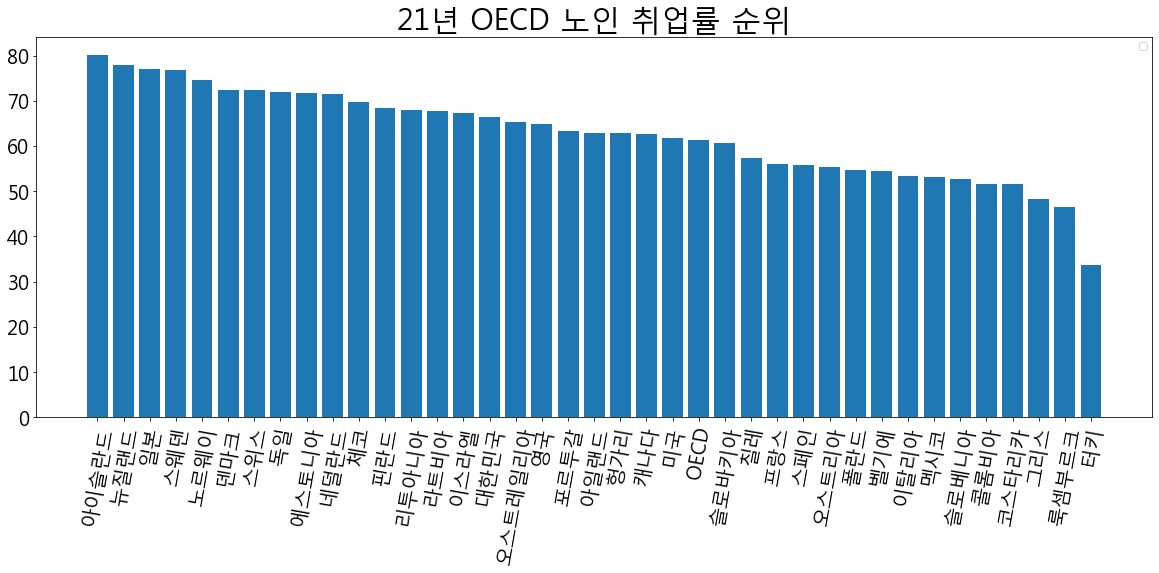

In [201]:
plt.figure(figsize=(20,7))

plt.bar(table_df.index, table_df['취업률'])
plt.title('21년 OECD 노인 취업률 순위', fontsize=30)

plt.xticks(rotation=80, size=20)
plt.yticks(size=20)
plt.legend()

#fig.tight_layout()
plt.show()

In [ ]:
# 21년 OECD 노인 취업률 순위 그래프입니다
# 현재 선진국들 현황, 그리고 우리나라의 위치를 알아보기 위해 자료를 가져왔습니다.
#  OECD 표를 보시면 현재 우리나라가 16위에 위치하고 있는 것을 보실 수 있는데,
#  OECD평균 61.3% 보다높은 66.3%으로 5%차이를 보이고 있습니다

In [202]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(host='localhost', user='root', password='forhs4534!',
db = 'koroecd', charset='utf8')
cur = conn.cursor()
query = """
select LOCATION  ,Value 
from oecd
where LOCATION = 'ISL' or LOCATION = 'NZL' or LOCATION = 'JPN' or LOCATION = 'SWE'
					or LOCATION = 'NOR' or LOCATION = 'KOR' or LOCATION = 'OECD' order by Value desc;

"""
cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
#for row in rows:
#print(rows)
table_df=pd.DataFrame(rows, columns=['나라코드','취업률'])
cur.close()
conn.close()
#table_df

In [203]:
table_df2=table_df.set_index(table_df['나라코드'])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


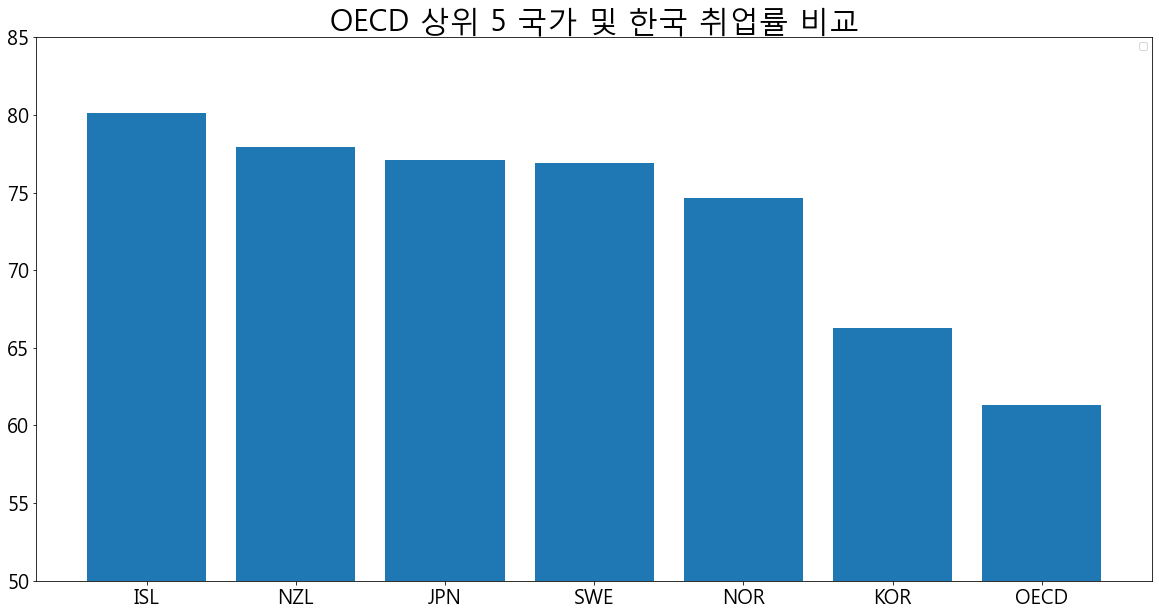

In [206]:
plt.figure(figsize=(20,10))

plt.bar(table_df2.index, table_df['취업률'])
plt.title('OECD 상위 5 국가 및 한국 취업률 비교', fontsize=30)

plt.xticks( size=20)
plt.yticks(size=20)
plt.legend()
plt.ylim(50, 85)
#fig.tight_layout()
plt.show()

In [ ]:
# 하지만 현 OECD평균 보다 높은 순위를 가지고 있지만 현재 대한민국이 선진국이라는 것을 생각한다면
# 상위 5개국, 복지선진국이라 불리는 나라의 수준과는 약 10% 많게는 14%의 차이를 보이고 있는 것을 보아 
# 우리나라가 노인의 인구는 많아짐에 따라
# (아이슬란드80%, 뉴질랜드77.9%, 일본77%, 스웨덴76.8%, 노르웨이74.6% 순)
# 복지사업이나 정책 등 많은 지원이 이루어지고 있지만, 정책의 홍보가 
# 제대로 이루어지지 않다거나 운영되는 시설이 부족하다고 판단할 수 있습니다.

In [180]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(host='localhost', user='root', password='forhs4534!',
db = 'koroecd', charset='utf8')
cur = conn.cursor()
query = """
select year,age,population, employed 
from korea_jop;
"""
cur.execute(query)
rows = cur.fetchall() # 모든 데이터를 가져옴
#for row in rows:
#print(rows)
table_df=pd.DataFrame(rows, columns=['년도','나이별','인구수','취업자'])
cur.close()
conn.close()
#table_df

In [113]:
#table_df

,년도,나이별,인구수,취업자
0,2019,ageAll,44504,27123
1,2020,ageAll,44785,26904
2,2021,ageAll,45080,27273
3,2019,age65,7713,2538
4,2020,age65,8146,2774
5,2021,age65,8582,2992


In [181]:
table_df3=table_df.set_index(table_df['년도'])
#table_df3

In [182]:
population = table_df3['인구수']
employed = table_df3['취업자']

div_data = employed / population * 2
#div_data

In [183]:
table_df3['취업률']= round(employed / population * 100,1)
table_df4=table_df3.iloc[3:][['취업률']]
#table_df4

In [118]:
#table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6 non-null      int64 
 1   나이별     6 non-null      object
 2   인구수     6 non-null      int64 
 3   취업자     6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


In [145]:
#table_df4

,취업률
년도,
2019,32.9
2020,34.1
2021,34.9


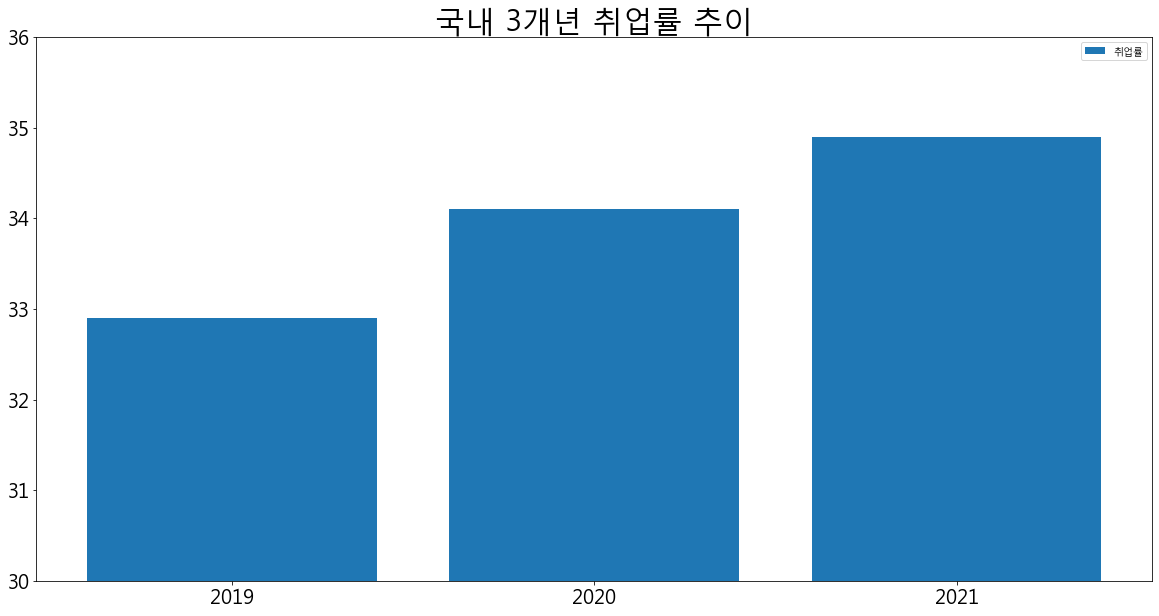

In [184]:
plt.figure(figsize=(20,10))

#table_df4.plot(kind='bar')
plt.bar(table_df4.index, table_df4['취업률'])
plt.title('국내 3개년 취업률 추이',fontsize=30)
plt.xticks(table_df4.index, size=20)
plt.yticks(size=20)
plt.legend(['취업률'])
plt.ylim(30, 36)

fig.tight_layout()
plt.show()

In [ ]:
# KOSIS자료를 보았을 떄 국내 65세 이상 노인 취업률이 2019년부터 21년까지 점차적으로 올라가는 것을 볼 수 있습니다. 
# 매년 1%씩 올랐는데, 현재 고령화사회로 진입하게되면 매년 높은 상승이 예상되는 부분으로 보여집니다.
# 고령인구가 많아질 수록 부족하지않은 지원정책이 필요할 것으로 생각됩니다.




# 결론

 OECD 취업률 그래프와 국내 그래프 그리고
 조원들이 분석한 노인 일자리에 대한 인식, 수익과 지출, 일자리정책, 정신과 건강, 정서적인 
 부분까지의 근거로 보았을때 취업률을 상승시키기에 몇가지 걸리는 부분

 ### ----이유----
 
- 노인들의 소득이 지출의 수준을 따라가지 못해 노년 노후자금 없이 살아가게 됩니다.
- 그로인해 당장 벌어야할 비용이 있는데 취업교육을 받기에 시간적인 부담이 되는 것

- 노인 일자리사업 중 공익활동이 72%로 아주 높지만 낮은 수준의 급여로 경제적활동하기에 부족하다는 것

- 경제적인 어려움으로 인해 좋지않은 방향, 그리고 삶의 의지를 잃어가는 것으로 생각됨.
 
- 은퇴자들의 취업지원 활동에 대한 만족도와 고용률 모두 나쁜 지표를 보인다는 것이다.
 
- 사회적 인식으로인한 취업기피 현상으로 취업지원프로그램이 좋지않다는 인식때문에 낮은 지원율로
- 시작으로 취업률 또한 오르지 않는 것이다.

### ---개선방안---
 
- 취업교육을 받는시기에 자금지원이 중요함

- 노인분들을 위한 심리치료 지원으로 사전에 정신질환을 예방해야 함

- 취업의지를 반영하여 낮은 소득의 용돈벌이식 일자리가 아닌 사회에 한 일원으로 생각이 될 수 있도록
- 하는 질좋은 취업지원을 제공하는 것이 중요함


- 취업지원 프로그램 및 노인 일자리 지원정책을 적극 홍보하여 지원프로그램의 이미지를 바꿔야한다.
- (이미지 개선으로 노인일자리 이라는 단어가 아닌 뉴청년일자리 이라는 명칭으로부터 개선해볼 수 있음.)
- 그리고 취업지원자들의 만족도를 향상 시킬 수 있는 수준의 프로그램을 제공해야한다고 생각됨